In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [205]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);


<IPython.core.display.Javascript object>

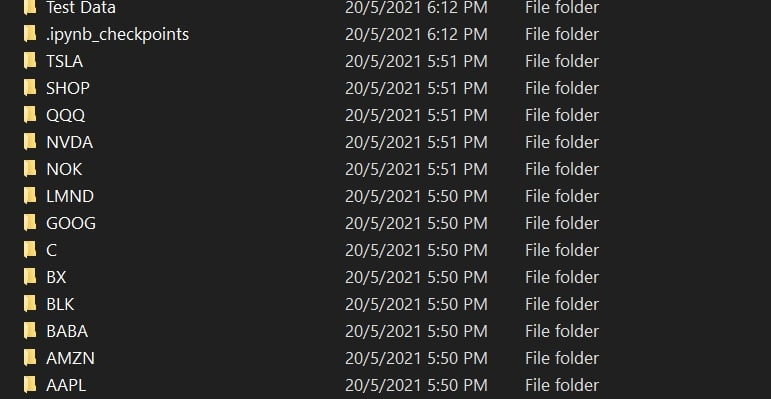

In [206]:
# dir = r"C:\Users\banila\RRL-Stock-Trading\Stock Tickers\Final Data\Daily" # VM path
dir = r"C:\Users\night\RRL-Stock-Trading\Stock Tickers\Final Data\Daily" # Local path

name2 = 'NVDA' # ticker name
path = f'{dir}\{name2}_Daily*.csv' # 15min, 30min, 1hr

import glob
files = glob.glob(path)
for f in files:
  print(f)

C:\Users\night\RRL-Stock-Trading\Stock Tickers\Final Data\Daily\NVDA_Daily.csv


In [207]:
### Dataframe df
import pandas as pd
df = pd.DataFrame()
for f in files:
    df_full = pd.read_csv(f)

print(f"No. of data points in {name2} test dataset: {len(df_full)}")

No. of data points in NVDA test dataset: 1106


In [208]:
df_full.head()

,symbol,time,close,high,low,open,volume
0,NVDA RHM8UTD8DT2D,2017-01-04,100.736120,105.031798,98.148838,103.125899,37054768.0
1,NVDA RHM8UTD8DT2D,2017-01-05,103.086399,104.182537,100.262114,102.286514,29908313.0
2,NVDA RHM8UTD8DT2D,2017-01-06,100.469491,104.508416,99.788108,103.224650,24217630.0
3,NVDA RHM8UTD8DT2D,2017-01-07,101.812508,102.948147,99.936235,101.220000,20665091.0
4,NVDA RHM8UTD8DT2D,2017-01-10,105.940309,106.651318,102.039636,102.207513,22945305.0


In [209]:
df_full.drop(['symbol'], axis=1, inplace=True)


In [210]:
df_full.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [211]:
df_full.head()

,Date,Close,High,Low,Open,Volume
0,2017-01-04,100.736120,105.031798,98.148838,103.125899,37054768.0
1,2017-01-05,103.086399,104.182537,100.262114,102.286514,29908313.0
2,2017-01-06,100.469491,104.508416,99.788108,103.224650,24217630.0
3,2017-01-07,101.812508,102.948147,99.936235,101.220000,20665091.0
4,2017-01-10,105.940309,106.651318,102.039636,102.207513,22945305.0


In [212]:
df_full.tail()

,Date,Close,High,Low,Open,Volume
1101,2021-05-20,562.63,563.18,541.68,542.99,8129956.0
1102,2021-05-21,584.50,587.42,570.13,572.10,7747321.0
1103,2021-05-22,599.67,608.88,594.69,605.78,15842334.0
1104,2021-05-25,624.48,629.80,607.00,608.10,12976527.0
1105,2021-05-26,625.91,632.75,619.27,630.26,10477429.0


In [213]:
# Check for NaN

print(df_full.isnull().values.any())


False


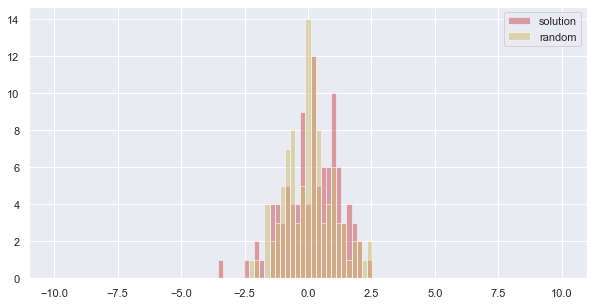

In [214]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [215]:
def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

iter 1000. w: -2.2623713923054547, solution: -3.484191503287673, reward: -21.933215
iter 2000. w: -3.498897291493416, solution: -3.484191503287673, reward: -0.008154
iter 3000. w: -3.502803037907195, solution: -3.484191503287673, reward: -0.009848
iter 4000. w: -3.475388471507962, solution: -3.484191503287673, reward: -0.007409
iter 5000. w: -3.478531576805721, solution: -3.484191503287673, reward: -0.005805


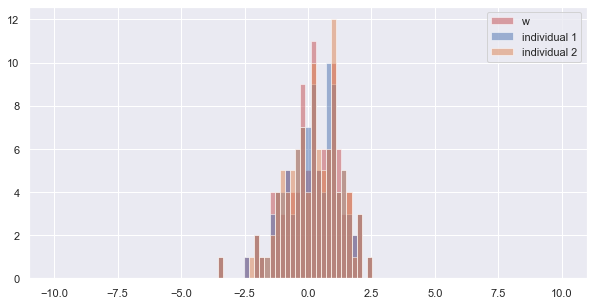

In [216]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [217]:
df= df_full.copy()
name = 'Deep Evolution Strategy'

In [218]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [219]:
close = df.Close.values.tolist()
get_state(close, 0, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [220]:
get_state(close, 1, 10)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.35027904]])

In [221]:
get_state(close, 2, 10)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.35027904, -2.61690733]])

In [222]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', (time.time() - lasttime)/60, 'minutes')

In [223]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

### Window Size

Possible to change?

In [224]:
window_size = 30 # Can we change this
model = Model(window_size, 500, 3)

In [225]:
initial_money = 10000
starting_money = initial_money
len_close = len(close) - 1
weight = model
skip = 1

state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 10
max_sell = 10


def act(model, sequence):
    decision, buy = model.predict(np.array(sequence))
    return np.argmax(decision[0]), int(buy[0])


for t in range(0, len_close, skip):
    action, buy = act(weight, state)
    next_state = get_state(close, t + 1, window_size + 1)
    if action == 1 and initial_money >= close[t]:
        if buy < 0:
            buy = 1
        if buy > max_buy:
            buy_units = max_buy
        else:
            buy_units = buy
        total_buy = buy_units * close[t]
        initial_money -= total_buy
        inventory.append(total_buy)
        quantity += buy_units
    elif action == 2 and len(inventory) > 0:
        if quantity > max_sell:
            sell_units = max_sell
        else:
            sell_units = quantity
        quantity -= sell_units
        total_sell = sell_units * close[t]
        initial_money += total_sell

    state = next_state
((initial_money - starting_money) / starting_money) * 100

59.849061472079846

In [226]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.max_buy* self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t] # Note
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.max_buy* self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy            
                total_buy = buy_units * self.close[t] # Note
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.title('total gains %f, total investment %f%%'%(initial_money - starting_money, invest))
        plt.legend()
        plt.savefig(f"DEA_{name2}_Capital_10k_MaxBS_100.png")
        plt.show()

In [227]:
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = 10000,
    max_buy = 100,
    max_sell = 100,
    close = close,
    window_size = window_size,
    skip = 1,
)

In [232]:
agent.fit(iterations = 200, checkpoint = 10) # change from 10 to 20

iter 10. reward: 2458.943763
iter 20. reward: 2584.897885
iter 30. reward: 2558.076750
iter 40. reward: 2723.532582
iter 50. reward: 2568.794031
iter 60. reward: 2778.864321
iter 70. reward: 2785.420493
iter 80. reward: 2780.998737
iter 90. reward: 2732.435505
iter 100. reward: 2877.582423
iter 110. reward: 2808.874444
iter 120. reward: 3009.110438
iter 130. reward: 3126.071574
iter 140. reward: 3187.117590
iter 150. reward: 3027.766394
iter 160. reward: 3131.280608
iter 170. reward: 3100.327251
iter 180. reward: 3122.847717
iter 190. reward: 3006.604620
iter 200. reward: 3129.185519
time taken to train: 5.995313262939453 minutes


day 9: buy 100 units at price 9984.735854, total balance 15.264146
day 17, sell 100 units at price 11037.423859, investment 10.542973 %, total balance 11052.688005,
day 18: buy 100 units at price 10864.609224, total balance 188.078781
day 20, sell 100 units at price 11252.701519, investment 3.572078 %, total balance 11440.780300,
day 21: buy 100 units at price 11394.903276, total balance 45.877024
day 24, sell 100 units at price 11764.232839, investment 3.241182 %, total balance 11810.109863,
day 25: buy 100 units at price 11712.882204, total balance 97.227658
day 28, sell 100 units at price 10702.657224, investment -8.624905 %, total balance 10799.884882,
day 30: buy 100 units at price 10763.882980, total balance 36.001902
day 33, sell 100 units at price 10968.298005, investment 1.899083 %, total balance 11004.299907,
day 34: buy 100 units at price 10951.489146, total balance 52.810761
day 37, sell 100 units at price 10323.627499, investment -5.733117 %, total balance 10376.438260,
da

day 528: buy 100 units at price 14729.961979, total balance 12870.290772
day 530, sell 100 units at price 15028.199719, investment 5.161739 %, total balance 27898.490490,
day 531: buy 100 units at price 15198.195230, total balance 12700.295260
day 534, sell 100 units at price 15571.986531, investment 8.229116 %, total balance 28272.281791,
day 535, sell 100 units at price 15761.864559, investment 7.005467 %, total balance 44034.146350,
day 536: buy 100 units at price 15485.497587, total balance 28548.648764
day 537, sell 100 units at price 15825.488610, investment 4.127420 %, total balance 44374.137374,
day 540: buy 1 units at price 154.497091, total balance 44219.640283
day 541, sell 1 units at price 153.511885, investment -0.637685 %, total balance 44373.152169,
day 547: buy 100 units at price 14990.944119, total balance 29382.208049
day 548: buy 100 units at price 16035.851934, total balance 13346.356115
day 554, sell 100 units at price 17485.785921, investment 16.642326 %, total ba

day 1046: buy 100 units at price 53606.499375, total balance 121212.524607
day 1048: buy 1 units at price 494.639291, total balance 120717.885316
day 1049, sell 100 units at price 49828.803130, investment -6.106841 %, total balance 170546.688446,
day 1050: buy 100 units at price 46357.001315, total balance 124189.687131
day 1052: buy 100 units at price 49873.000000, total balance 74316.687131
day 1058: buy 1 units at price 508.900000, total balance 73807.787131
day 1059, sell 100 units at price 51383.000000, investment -3.615794 %, total balance 125190.787131,
day 1061: buy 100 units at price 52283.000000, total balance 72907.787131
day 1063, sell 100 units at price 50141.000000, investment -4.376588 %, total balance 123048.787131,
day 1065: buy 100 units at price 51793.000000, total balance 71255.787131
day 1066: buy 100 units at price 51487.000000, total balance 19768.787131
day 1069, sell 100 units at price 55950.000000, investment 2.722368 %, total balance 75718.787131,
day 1070: b

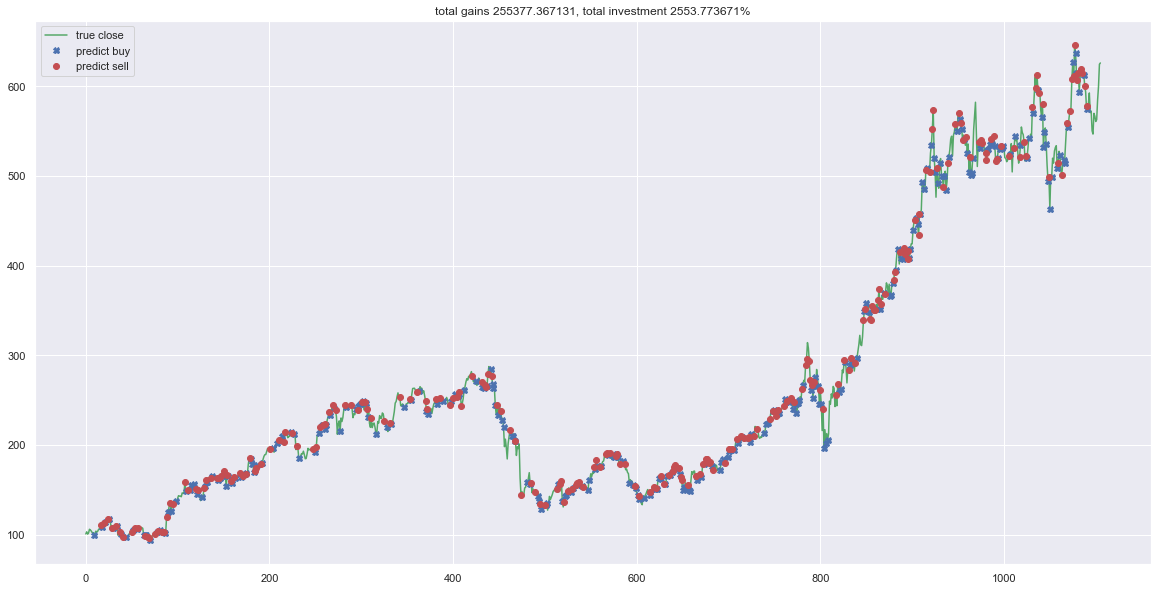

In [233]:
agent.buy()


In [234]:
# Comparison

## Buy and Hold
capital = 10000
buy_price = df_full.at[0,'Open']
sell_price = df_full.at[1105,'Close']
shares_bought = math.floor(capital/buy_price)
total_gains = shares_bought*sell_price - capital
total_investment = total_gains/100


print(f"Buy Price:{buy_price}, Sell Price:{sell_price}")
print(f"Buy and Hold Max Profit: {total_investment}%")

## Oracle
min_price = df_full['Open'].min()
max_price = df_full['Close'].max()
shares_bought = math.floor(capital/min_price)
total_gains = shares_bought*max_price - capital
total_investment = total_gains/100

print(f"Min Price:{min_price}, Sell Price:{max_price}")
print(f"Oracle Max Profit: {total_investment}%")

Buy Price:103.125899046, Sell Price:625.91
Buy and Hold Max Profit: 500.8736%
Min Price:94.94059117, Sell Price:645.49
Oracle Max Profit: 577.7645%
